# FASHION MNIST Keras Classifier

## Context

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

In [45]:
![Fashion MNIST](./data/fashion_mnist_header.png)

/bin/sh: 1: Syntax error: "(" unexpected


## Content

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

# Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

Each row is a separate image. Column 1 is the class label. Remaining columns are pixel numbers (784 total). Each value is the darkness of the pixel (1 to 255)

In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import pandas as pd
import seaborn as sns

In [2]:
(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_mnist.load_data() 

In [3]:
print(f"Train data shape {X_train_full.shape}")
print(f"Test data shape {X_train_full.shape}")

Train data shape (60000, 28, 28)
Test data shape (60000, 28, 28)


We must transform input features, scaling the intensities down to 0-1 range by dividing them by 255.0. 

In [11]:
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

List of class names

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

For Model definition it will be using Keras Funtional API. The model is made up by the following layers.

In [14]:
inputs = Input(shape=(28,28))
x = Flatten()(inputs)
x = Dense(300, activation='relu', kernel_initializer='he_normal')(x)
x = Dense(100, activation='relu', kernel_initializer='he_normal')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [15]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
EPOCHS = 35
BATCH = 32

history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size= BATCH, validation_data=(X_valid, y_valid))#, verbose=0)

Train on 55000 samples, validate on 5000 samples
Epoch 1/35
55000/55000 [==============================] - 9s 172us/sample - loss: 0.2617 - accuracy: 0.9159 - val_loss: 0.5147 - val_accuracy: 0.8890
Epoch 2/35
55000/55000 [==============================] - 9s 169us/sample - loss: 0.1475 - accuracy: 0.9477 - val_loss: 0.5937 - val_accuracy: 0.8966
Epoch 3/35
55000/55000 [==============================] - 9s 170us/sample - loss: 0.1234 - accuracy: 0.9561 - val_loss: 0.5871 - val_accuracy: 0.8972
Epoch 4/35
55000/55000 [==============================] - 9s 173us/sample - loss: 0.1082 - accuracy: 0.9608 - val_loss: 0.5668 - val_accuracy: 0.8864
Epoch 5/35
55000/55000 [==============================] - 9s 172us/sample - loss: 0.1044 - accuracy: 0.9617 - val_loss: 0.5733 - val_accuracy: 0.8988
Epoch 6/35
55000/55000 [==============================] - 9s 171us/sample - loss: 0.1025 - accuracy: 0.9629 - val_loss: 0.6329 - val_accuracy: 0.8904
Epoch 7/35
55000/55000 [===========================

In [46]:
# Preparing data for seaborn plots

new_hist = history.history.copy()
new_hist.update({'epochs': [i for i in range(EPOCHS)]})
df = pd.melt(pd.DataFrame(new_hist), id_vars='epochs')

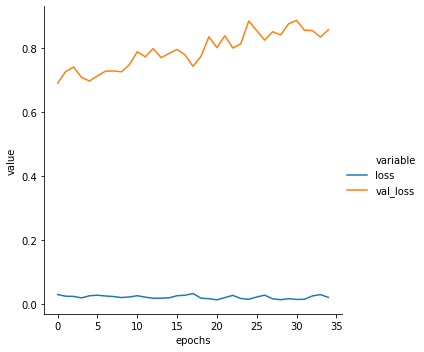

In [47]:
# Training ploting

mask = df.variable.isin(['loss', 'val_loss'])

sns.relplot(x='epochs', y='value', hue='variable',
             dashes=False, markers=True, kind="line", data=df[mask]);

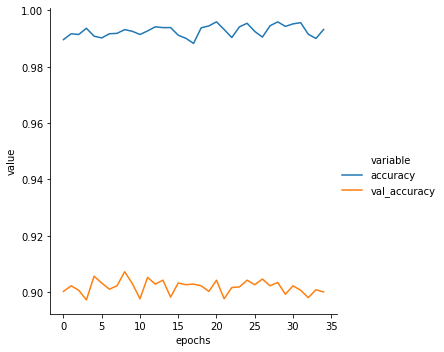

In [48]:
# Training ploting

mask = df.variable.isin(['accuracy', 'val_accuracy'])

sns.relplot(x='epochs', y='value', hue='variable',
             dashes=False, markers=True, kind="line", data=df[mask]);